In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('full_dataset.csv', sep = '\t')

In [14]:
df

,source,title,link,content,len,model,temperature,prompt,result,score
0,abcnews,Landmark Supreme Court case weighs gender-affi...,https://abcnews.go.com/Politics/landmark-supre...,The justices are considering Tennessee's ban o...,7441,claude,0,\n You are an AI trained to evaluate politi...,Here's my analysis of the political bias in th...,0.5
1,abcnews,Landmark Supreme Court case weighs gender-affi...,https://abcnews.go.com/Politics/landmark-supre...,The justices are considering Tennessee's ban o...,7441,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article presents bot...,0.0
2,abcnews,Landmark Supreme Court case weighs gender-affi...,https://abcnews.go.com/Politics/landmark-supre...,The justices are considering Tennessee's ban o...,7441,gemini,0,\n You are an AI trained to evaluate politi...,1. **Explanation:**\n\n* **Presentation of Mul...,0.0
3,abcnews,Hegseth says he will not 'back down' as scruti...,https://abcnews.go.com/Politics/pete-hegseth-b...,GOP senators have voiced growing concern over ...,3082,claude,0,\n You are an AI trained to evaluate politi...,Explanation:\n\n• The article primarily report...,0.0
4,abcnews,Hegseth says he will not 'back down' as scruti...,https://abcnews.go.com/Politics/pete-hegseth-b...,GOP senators have voiced growing concern over ...,3082,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article presents a m...,0.0
...,...,...,...,...,...,...,...,...,...,...
2245,cnn,Trump’s master plan for a radical reformation ...,https://www.cnn.com/2024/11/07/politics/donald...,A version of this story appeared in CNN’s What...,9234,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article discusses Do...,-0.5
2246,cnn,Trump’s master plan for a radical reformation ...,https://www.cnn.com/2024/11/07/politics/donald...,A version of this story appeared in CNN’s What...,9234,gemini,0,\n You are an AI trained to evaluate politi...,1. **Explanation:**\n\n* **Factual Reporting:*...,0.0
2247,cnn,Trump’s master plan for a radical reformation ...,https://www.cnn.com/2024/11/07/politics/donald...,A version of this story appeared in CNN’s What...,9234,claude,0,\n You are an AI trained to evaluate politi...,Here's my analysis of the political bias in th...,0.0
2248,cnn,Trump’s master plan for a radical reformation ...,https://www.cnn.com/2024/11/07/politics/donald...,A version of this story appeared in CNN’s What...,9234,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article discusses Do...,1.0


In [15]:
df_group = df.groupby(['link', 'model'])['score'].var().reset_index()
df_group

,link,model,score
0,https://abcnews.go.com/Politics/biden-angola-v...,claude,0.000
1,https://abcnews.go.com/Politics/biden-angola-v...,gemini,0.000
2,https://abcnews.go.com/Politics/biden-angola-v...,gpt,0.075
3,https://abcnews.go.com/Politics/biden-hopes-tr...,claude,0.042
4,https://abcnews.go.com/Politics/biden-hopes-tr...,gemini,0.000
...,...,...,...
442,https://www.foxnews.com/world/israels-netanyah...,gemini,0.000
443,https://www.foxnews.com/world/israels-netanyah...,gpt,0.000
444,https://www.foxnews.com/world/us-scrambles-dro...,claude,0.018
445,https://www.foxnews.com/world/us-scrambles-dro...,gemini,0.000


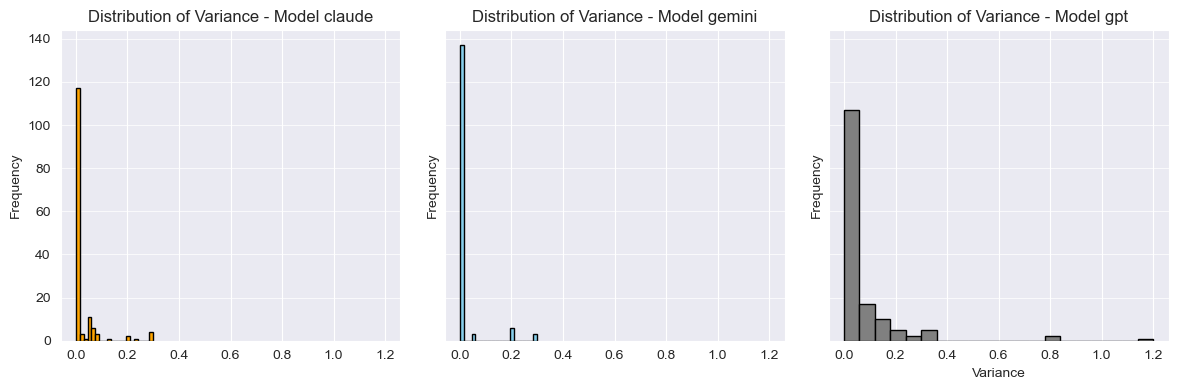

In [16]:
grouped_pivot = df_group.pivot(index='link', columns='model', values='score')
# Create subplots
models = grouped_pivot.columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

colors = ['orange', 'skyblue', 'gray']  # Colors for the models
for idx, model in enumerate(models):
    variances = grouped_pivot[model].dropna()  # Exclude NaN values
    axes[idx].hist(variances, bins=20, color=colors[idx], alpha=1, edgecolor='black')
    axes[idx].set_title(f'Distribution of Variance - Model {model}')
    axes[idx].grid(axis='y', alpha=0.75)
    axes[idx].set_ylabel('Frequency')

# Shared labels for the whole figure
plt.xlabel('Variance')
plt.tight_layout()
plt.savefig('fig/h1.png')
plt.show()


In [31]:
import numpy as np
from scipy.stats import wilcoxon

models = ['claude', 'gemini', 'gpt']
for model in models:
    print(model)
    variances_1 = df_group[df_group['model'] == model]['score'].values
    mean_variance = variances_1.mean()
    print(f"Mean of variances: {mean_variance:.4f}")

    # Calculate the median with higher precision
    median_variance = np.median(variances_1)
    print(f"Median of variances (precise): {median_variance:.4f}")  # Increased precision

    # Perform Wilcoxon signed-rank test
    stat, p_value = wilcoxon(variances_1)

    # Output results
    print(f"Wilcoxon Statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("Reject null hypothesis: The median variance is significantly different from 0.")
    else:
        print("Fail to reject null hypothesis: Insufficient evidence to suggest the median variance is greater than 0.")
    print('===')


claude
Mean of variances: 0.0227
Median of variances (precise): 0.0000
Wilcoxon Statistic: 0.0
P-value: 1.5708369269665253e-08
Reject null hypothesis: The median variance is significantly different from 0.
===
gemini
Mean of variances: 0.0151
Median of variances (precise): 0.0000
Wilcoxon Statistic: 0.0
P-value: 0.001982101226243948
Reject null hypothesis: The median variance is significantly different from 0.
===
gpt
Mean of variances: 0.0642
Median of variances (precise): 0.0000
Wilcoxon Statistic: 0.0
P-value: 4.820602998159598e-11
Reject null hypothesis: The median variance is significantly different from 0.
===


In [18]:
df_group[df_group['score']>1]

,link,model,score
233,https://www.cnn.com/2024/12/02/politics/karoli...,gpt,1.2


In [22]:
high_var = df[(df['link'] == 'https://www.cnn.com/2024/12/02/politics/karoline-leavitt-pence-january-6-2020-election/index.html') & (df['model']=='gpt')]
high_var.to_csv('high_var_gpt.csv', sep = '\t', encoding='utf-8-sig', index = False)